# model to classify employees based on the likelihood of the churn

In [1]:
import pandas as pd
from src.data_cleaning import clean_dataset
from src.classification_evaluation import classification_eval
from src.utils import get_X_y
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

PATH = "datasets/employee-churn/churn.csv"
dataset = pd.read_csv(PATH)
dataset = clean_dataset(dataset)

## ML based methods

### Already trained model

The best model from the `loyal_employees` notebook was trained excluding the categorical columns

Classification Report:
               precision    recall  f1-score   support

 Not looking       0.83      0.89      0.86      2880
     Looking       0.57      0.47      0.52       952

    accuracy                           0.78      3832
   macro avg       0.70      0.68      0.69      3832
weighted avg       0.77      0.78      0.77      3832



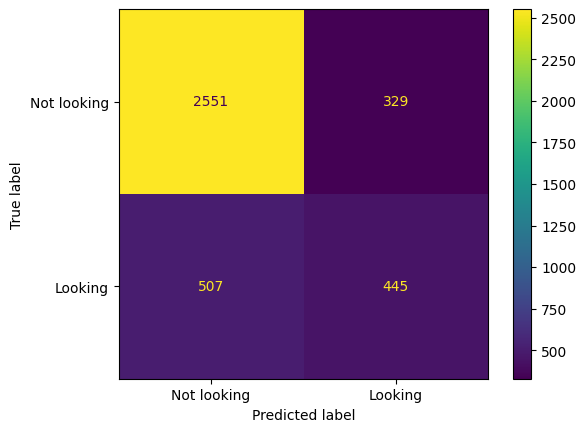

In [2]:
X, y = get_X_y(dataset)

categorical_cols = ["city", "gender", "enrolled_university", "major_discipline", "company_type"]
X.drop(categorical_cols, axis=1, inplace=True)

# split the data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

classification_eval(
    y_test=y_test,
    y_pred=model.predict(X_test),
)

### LogisticRegression without categorical column

Classification Report:
               precision    recall  f1-score   support

 Not looking       0.79      0.93      0.86      2880
     Looking       0.56      0.27      0.36       952

    accuracy                           0.77      3832
   macro avg       0.68      0.60      0.61      3832
weighted avg       0.74      0.77      0.73      3832



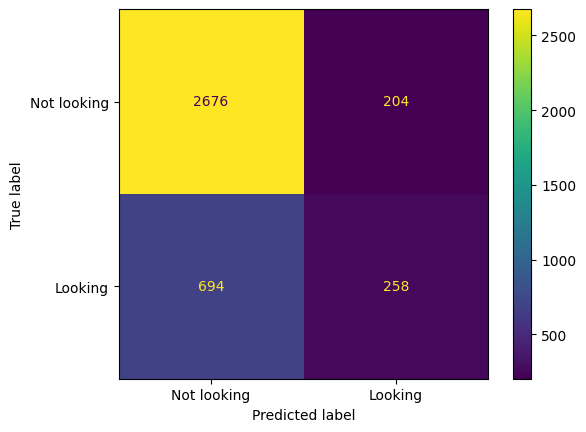

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = get_X_y(dataset)

categorical_cols = ["city", "gender", "enrolled_university", "major_discipline", "company_type"]
X.drop(categorical_cols, axis=1, inplace=True)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

classification_eval(
    y_test=y_test,
    y_pred=model.predict(X_test),
)